# Data overview

In [447]:
import pandas as pd
import matplotlib.pyplot as plt

In [448]:
df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [449]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [450]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [451]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Data preprocessing

In [453]:
# keep only the necessary columns
df = df[['budget', 'original_language', 'original_title', 'overview', 'release_date', 
         'revenue', 'runtime', 'status', 'vote_average', 'vote_count']]

In [454]:
df.head()

,budget,original_language,original_title,overview,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,961000000,169.0,Released,6.9,4500
2,245000000,en,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,880674609,148.0,Released,6.3,4466
3,250000000,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,1084939099,165.0,Released,7.6,9106
4,260000000,en,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,284139100,132.0,Released,6.1,2124


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   original_language  4803 non-null   object 
 2   original_title     4803 non-null   object 
 3   overview           4800 non-null   object 
 4   release_date       4802 non-null   object 
 5   revenue            4803 non-null   int64  
 6   runtime            4801 non-null   float64
 7   status             4803 non-null   object 
 8   vote_average       4803 non-null   float64
 9   vote_count         4803 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 375.4+ KB


In [456]:
# check for NaN values
df.isna().sum()

budget               0
original_language    0
original_title       0
overview             3
release_date         1
revenue              0
runtime              2
status               0
vote_average         0
vote_count           0
dtype: int64

In [457]:
# just delete the empty lines as there are very few of them
df = df.dropna()

In [458]:
# keep the year from the release_date and fix type
df['release_date'] = df['release_date'].apply(lambda x: x[:x.find('-')])
df['release_date'] = df['release_date'].apply(lambda x: int(x))


df['revenue'] = df['revenue'].apply(lambda x: int(x))
df['budget'] = df['budget'].apply(lambda x: int(x))

In [459]:
df.head()

,budget,original_language,original_title,overview,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009,2787965087,162.0,Released,7.2,11800
1,300000000,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007,961000000,169.0,Released,6.9,4500
2,245000000,en,Spectre,A cryptic message from Bond’s past sends him o...,2015,880674609,148.0,Released,6.3,4466
3,250000000,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2012,1084939099,165.0,Released,7.6,9106
4,260000000,en,John Carter,"John Carter is a war-weary, former military ca...",2012,284139100,132.0,Released,6.1,2124


# Analysis / Data visualization

en: 4503
fr: 70
es: 32
zh: 27
de: 26
hi: 19
ja: 16
it: 13
cn: 12
ru: 11


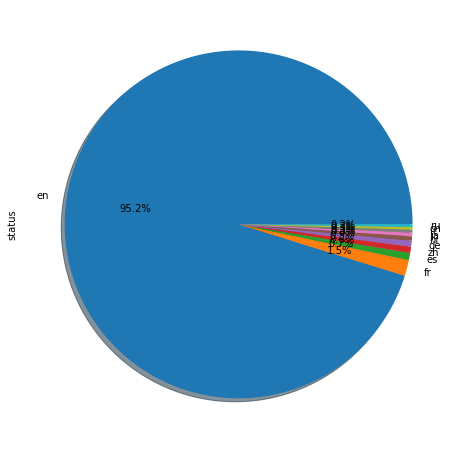

In [460]:
# Here we count how many films have been released by language
lang_count = df.groupby(['original_language'])['status'].count().sort_values(ascending=False)[:10]

# here we plot a pie plot
lang_count.plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
for lang, count in lang_count.items():
    print(f'{lang}: {count}')

**Since almost all of our movies are in English, we have a schedule like this**

<AxesSubplot:ylabel='status'>

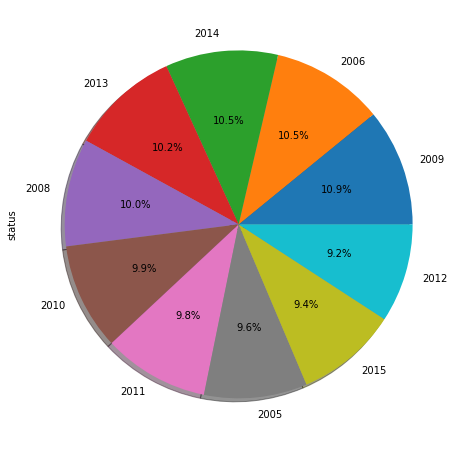

In [461]:
release_date = df.groupby(['release_date'])['status'].count().sort_values(ascending=False)[:10]
release_date.plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))

**We can notice that every year approximately the same number of films is released, but there is no data for 2020 because of the quarantine the film industry has stopped**

All movies: 4799


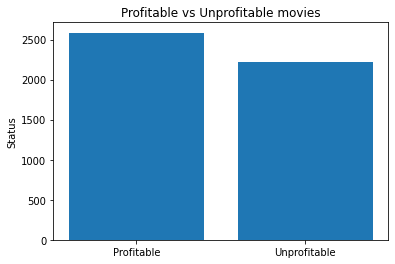

In [462]:
# сounting the number of profitable and unprofitable movies 
financially_successful = []
for _, rows in df.iterrows():
    financially_successful.append(rows['revenue'] > rows['budget'])
    
plt.bar(['Profitable', 'Unprofitable'], [financially_successful.count(True), financially_successful.count(False)])
plt.title('Profitable vs Unprofitable movies')
plt.ylabel('Count')
plt.ylabel('Status')
print(f'All movies: {len(financially_successful)}')

**We can notice that more than half of the films are profitable, the rest are unprofitable**

<AxesSubplot:xlabel='release_date'>

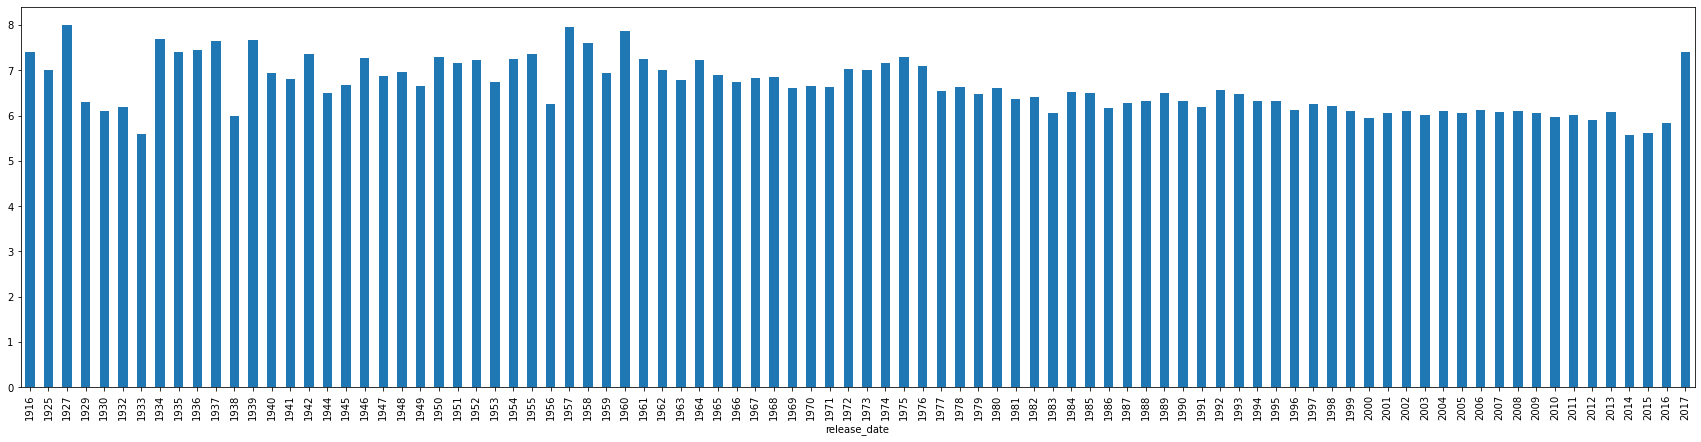

In [463]:
graph = df.groupby(['release_date'])['vote_average'].mean()

graph.plot.bar(figsize=(30,7))

**We can notice that at the beginning of 2000 not very good movies are coming out compared to the past**

<AxesSubplot:xlabel='release_date'>

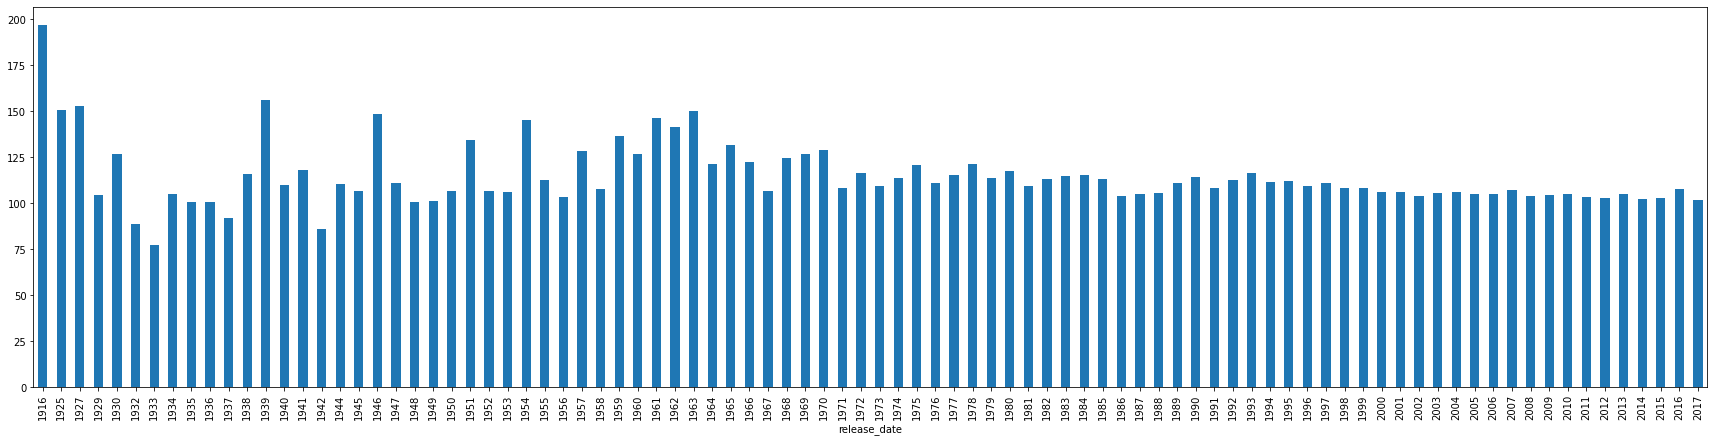

In [464]:
graph = df.groupby(['release_date'])['runtime'].mean()

graph.plot.bar(figsize=(30,7))

**We may note that from the end of 1900 the films moved to a 1.5 hour format**

In [465]:
df.head()

,budget,original_language,original_title,overview,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009,2787965087,162.0,Released,7.2,11800
1,300000000,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007,961000000,169.0,Released,6.9,4500
2,245000000,en,Spectre,A cryptic message from Bond’s past sends him o...,2015,880674609,148.0,Released,6.3,4466
3,250000000,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2012,1084939099,165.0,Released,7.6,9106
4,260000000,en,John Carter,"John Carter is a war-weary, former military ca...",2012,284139100,132.0,Released,6.1,2124


# Mini app

In [466]:
print('Choose a category: \n\t[1] Top 10 Best Movies\n\t[2] Top 10 Most Failed Movies\n\t[3] Top 10 most expensive movies\n')

category = input()
while not category.isdigit() or not (1 <= int(category) <= 3):
    print('You entered a wrong number or a number not within 1 to 3!')
    category = input()

Choose a category: 
	[1] Top 10 Best Movies
	[2] Top 10 Most Failed Movies
	[3] Top 10 most expensive movies



 2


In [467]:
def get_top_list(number: int):
    if number == 1:
        print('\n\nTop 10 Best Movies')
        a = df.sort_values(by=['vote_count'], ascending=False)[:10]
        a = a.sort_values(by=['vote_average'], ascending=False)
        a = a[['original_title', 'release_date', 'runtime', 'vote_average', 'budget']]
        return a.head()
    
    elif number == 2:
        print('\n\nTop 10 Most Failed Movies')
        a = df.sort_values(by=['vote_count'], ascending=False)[:10]
        a = a.sort_values(by=['vote_average'], ascending=True)
        a = a[['original_title', 'release_date', 'runtime', 'vote_average', 'budget']]
        return a.head()
    
    else:
        print('\n\nTop 10 most expensive movies')
        a = df.sort_values(by=['budget'], ascending=False)[:10]
        a = a[['original_title', 'release_date', 'runtime', 'vote_average', 'budget']]
        return a.head()    
    
    
get_top_list(int(category))



Top 10 Most Failed Movies


,original_title,release_date,runtime,vote_average,budget
426,The Hunger Games,2012,142.0,6.9,75000000
0,Avatar,2009,162.0,7.2,237000000
127,Mad Max: Fury Road,2015,120.0,7.2,150000000
16,The Avengers,2012,143.0,7.4,220000000
788,Deadpool,2016,108.0,7.4,58000000
